<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/%E7%B7%9A%E5%BD%A2%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%EF%BD%B1%EF%BD%B2%EF%BD%BD%EF%BD%BA%EF%BD%B0%EF%BE%8B%EF%BD%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#練習問題[喫茶店の売上データに対する線形単回帰分析]
#喫茶店のアイスコーヒーの売り上げとその日の最高気温についてのデータ
#icecoffee.csvをDataFrame形式で読み込みなさい
#head関数を用いて読み込んだデータを表示しなさい
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import matplotlib.style
matplotlib.style.use("ggplot")
icecoffee_df = pd.read_csv("icecoffee.csv")
icecoffee_df.head()

,Unnamed: 0,temperature,icecoffee
0,2020/7/1,30,76
1,2020/7/2,28,61
2,2020/7/3,33,92
3,2020/7/4,31,84
4,2020/7/5,25,59


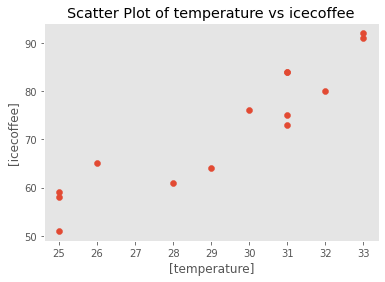

In [ ]:
#データを散布図で可視化し、回帰直線を引く意味があるか考察しなさい
plt.scatter(icecoffee_df["temperature"],
            icecoffee_df["icecoffee"])
plt.title("Scatter Plot of temperature vs icecoffee")
plt.xlabel("[temperature]")
plt.ylabel("[icecoffee]")
plt.grid()
plt.show()

In [ ]:
#データの相関係数を確認しなさい
print(icecoffee_df[["temperature","icecoffee"]].corr())
#0.9と、1に近い為非常に強い相関関係

             temperature  icecoffee
temperature     1.000000   0.925016
icecoffee       0.925016   1.000000


In [ ]:
#LinearRegressionライブラリを用いて回帰係数と切片を算出しなさい
#データ数が少ないため、学習データと検証データの分類は実施しなくてよい
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()
X = icecoffee_df[["temperature"]].values
Y = icecoffee_df[["icecoffee"]].values
lr.fit(X, Y)

print("temperature = ", lr.intercept_)
print("icecoffee = ", lr.coef_[0])

temperature =  [-45.58706468]
icecoffee =  [4.02736318]


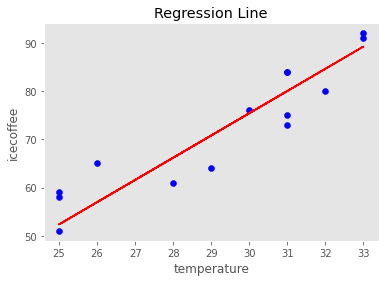

In [ ]:
#matplotlibを用いてデータの散布図と回帰直線をグラフ化しなさい
plt.scatter(X, Y, color = "blue")
plt.plot(X, lr.predict(X), color = "red")
plt.title("Regression Line")
plt.xlabel("temperature")
plt.ylabel("icecoffee")
plt.grid()
plt.show()

In [ ]:
#回帰分析から得られた回帰式を示しなさい▪𝑦 = 𝑎 + 𝑏𝑥
#データに含まれる x の最大値は33
#x=38の時の yの値 を予測
#▪𝑦 = 𝑎 + 𝑏 × 38
#=
x_38 = np.array(38).reshape(-1,1)
y_pred = lr.predict(x_38)
print(y_pred[0])

[112.2962963]


In [ ]:
#回帰式の精度を確認する
#残差のばらつきを見る残差分析を実施しなさい
y_pred = lr.predict(X)
plt.scatter(y_pred, y_pred - y,
            color = "blue")
plt.hlines(y = 0, xmin = -10, xmax = 50,
           color = "black")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()
#aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

NameError: ignored

In [ ]:
from sklearn.metrics import  mean_squared_error
#学習データに対する目的変数を予測
Y_train_pred = lr.predict(X_train)
#学習データを用いたときの平均二乗誤差を出力
print("MSE train data:",
      mean_squared_error(Y_train, Y_train_pred))
#検証データを用いたときの平均二乗誤差を出力
print("MSE test data:",
      mean_squared_error(Y_test, Y_pred))

MSE train data: 22.20370370370368
MSE test data: 30.881207133059007


In [ ]:
from sklearn.metrics import r2_score
print("r^2 train data:",r2_score(Y_train, Y_train_pred))
print("r^2 test data:",r2_score(Y_test, Y_pred))

r^2 train data: 0.8517556874381802
r^2 test data: 0.813789151392553
